In [28]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [29]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
df = dfLE.copy()                                        # Create duplicate of data
df.replace([np.inf, - np.inf], np.nan, inplace = True)  # Exchange inf by NaN
df.dropna(inplace=True)
df.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [30]:
print(df.columns)
df.sample(10)

Index(['Country', 'isDeveloped', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population',
       'Schooling'],
      dtype='object')


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
172,Tonga,0.0,72.53125,129.6250,0.0000,1.167333,75.500000,0.2500,62.94375,0.0000,76.8750,70.3125,4.164963e+07,2.658981e+04,14.21875
94,Lesotho,0.0,48.78125,550.0625,4.5000,2.086667,73.230769,266.6875,25.23750,6.3125,67.9375,79.4375,9.340662e+08,1.200528e+06,10.65625
31,CentralAfricanRepublic,0.0,48.51250,333.0625,16.5000,1.231333,42.571429,699.4375,17.08750,24.5000,41.3125,42.4375,7.638220e+08,2.016546e+06,6.23750
185,Vanuatu,0.0,71.38750,137.8750,0.0000,0.806667,56.125000,20.8750,44.25625,0.0000,66.1875,59.0625,2.665601e+08,1.230962e+05,10.56875
114,Myanmar,0.0,64.20000,154.3125,56.6250,0.351333,65.461538,914.5000,17.12500,76.9375,70.6875,72.3750,1.394977e+10,2.601570e+07,8.32500
126,Pakistan,0.0,64.50000,154.0000,367.9375,0.026000,67.307692,3842.3125,18.31250,461.0000,64.1875,70.8750,6.982217e+10,6.902796e+07,6.71875
122,Nigeria,0.0,51.35625,248.5000,535.6875,8.646667,42.909091,51653.9375,19.75000,852.0625,41.3125,39.3125,1.031998e+11,7.087700e+07,9.00000
95,Liberia,0.0,57.52500,246.9375,10.6875,3.258000,49.125000,705.3125,19.98750,14.7500,59.4375,40.6875,6.844234e+08,2.788943e+06,9.86875
81,Israel,0.0,81.30000,59.5000,0.9375,2.497333,97.437500,138.9375,54.98750,1.0000,94.2500,89.0000,6.559575e+08,2.786288e+04,15.71250
88,Kiribati,0.0,65.15000,129.4375,0.0000,0.440667,75.187500,0.0000,69.43125,0.0000,75.2500,74.9375,3.520898e+07,3.591994e+04,11.69375


In [31]:
Population=df['Population']
Population=np.log(Population)
Population.head()

0    16.115318
1    13.454414
2    16.890508
3    16.132698
5    16.817285
Name: Population, dtype: float64

In [32]:
GDP=df['GDP']
lnGDP=np.log(GDP)
lnGDP.head()

0    22.143172
1    20.877649
2    25.019952
3    23.804182
5    25.824095
Name: GDP, dtype: float64

In [33]:
#Part 1
df['GDPPerCapita']=GDP/Population
df.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250,2.566958e+08
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750,8.673269e+07
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250,4.348949e+09
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375,1.349951e+09
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625,9.761263e+09


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

array([[<AxesSubplot:title={'center':'isDeveloped'}>,
        <AxesSubplot:title={'center':'Lifeexpectancy'}>,
        <AxesSubplot:title={'center':'AdultMortality'}>,
        <AxesSubplot:title={'center':'infantdeaths'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'HepatitisB'}>,
        <AxesSubplot:title={'center':'Measles'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'under-fivedeaths'}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'GDP'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Schooling'}>,
        <AxesSubplot:title={'center':'GDPPerCapita'}>, <AxesSubplot:>]],
      dtype=object)

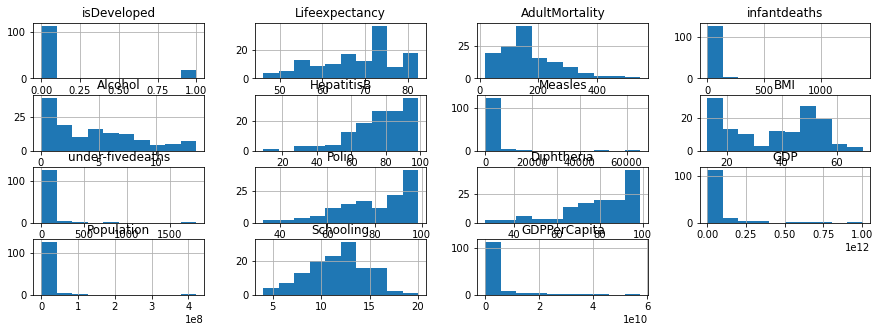

In [34]:
df.hist()

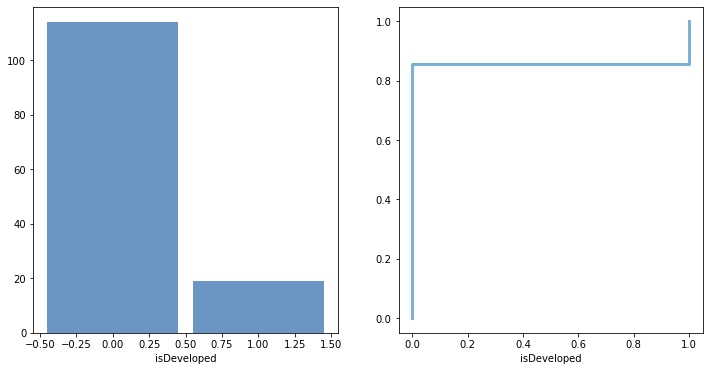

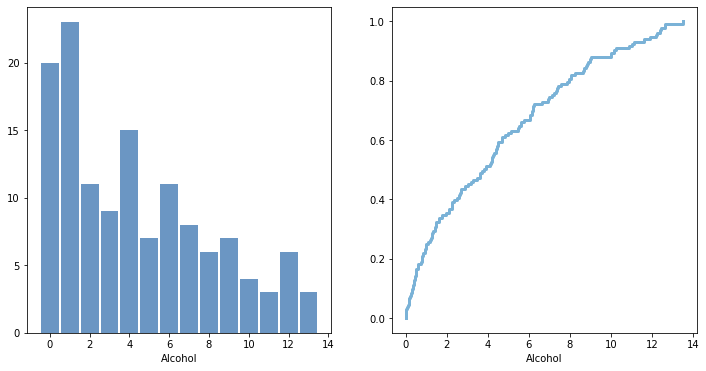

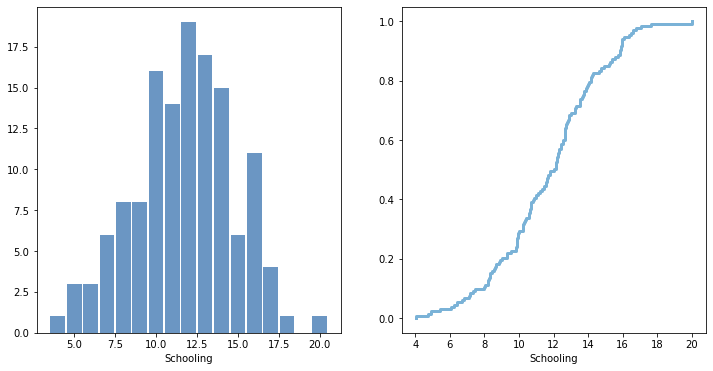

<Figure size 576x432 with 0 Axes>

In [35]:
from cProfile import label


col1=['isDeveloped','Alcohol','Schooling']

i=0
while i < len(col1):
    h = col1[i]
    hist=thinkstats2.Hist(round(df[h],0))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show(xlabel=h)
    i = i + 1




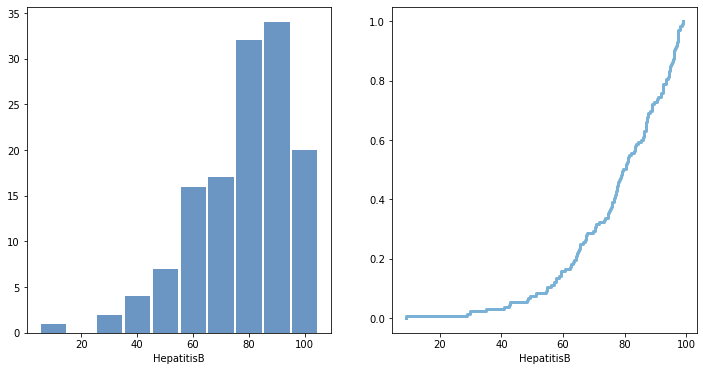

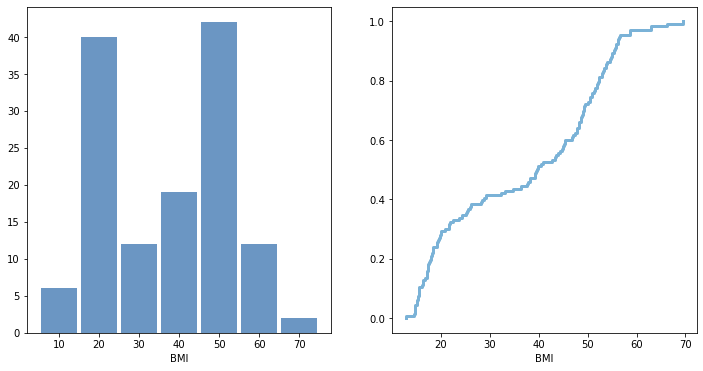

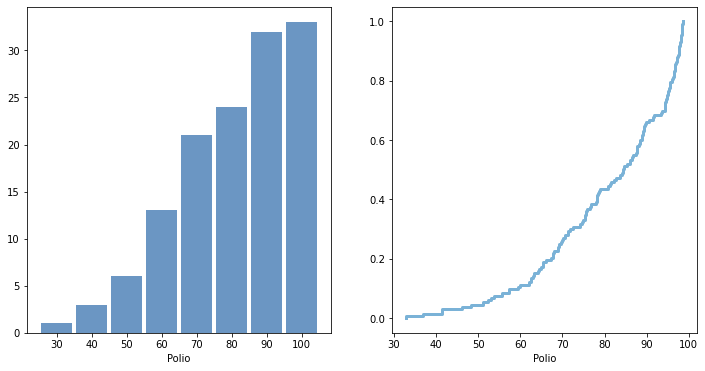

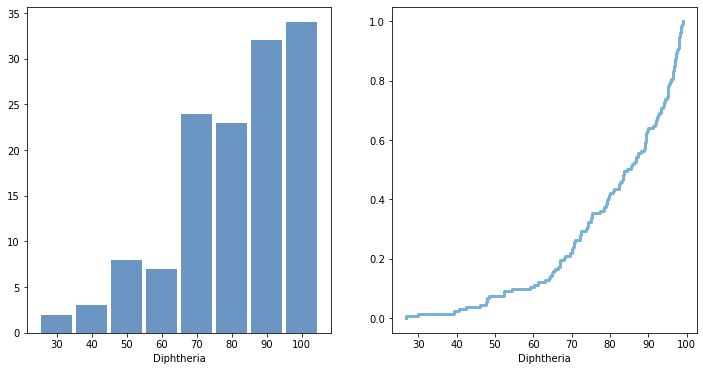

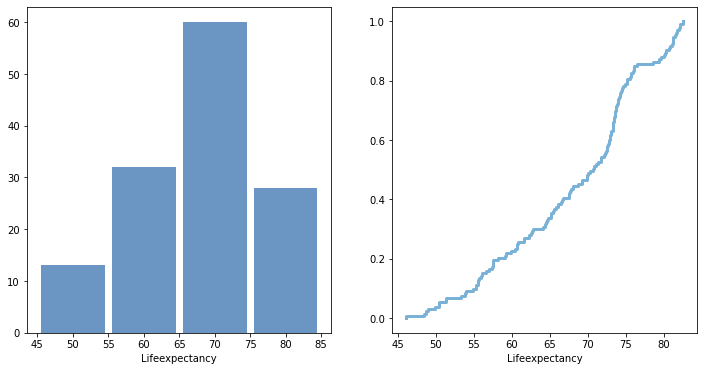

<Figure size 576x432 with 0 Axes>

In [36]:
col2=['HepatitisB','BMI','Polio','Diphtheria', 'Lifeexpectancy']
i=0
while i < len(col2):
    h = col2[i]
    hist=thinkstats2.Hist(round(df[h],-1))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1

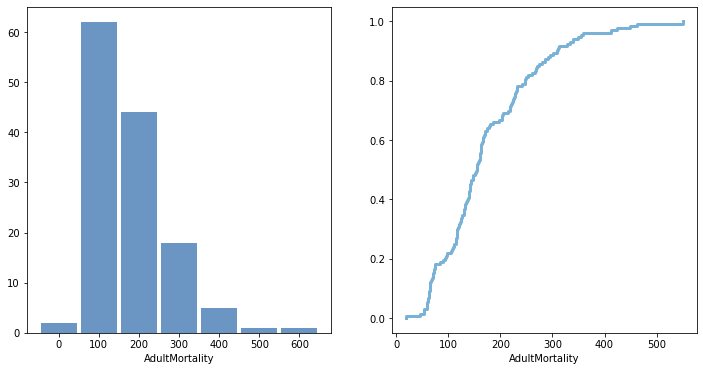

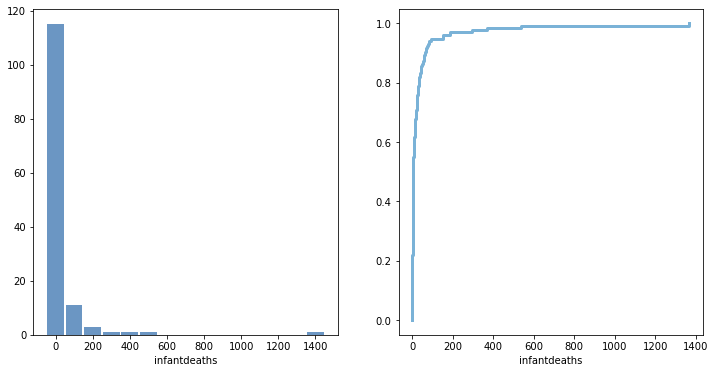

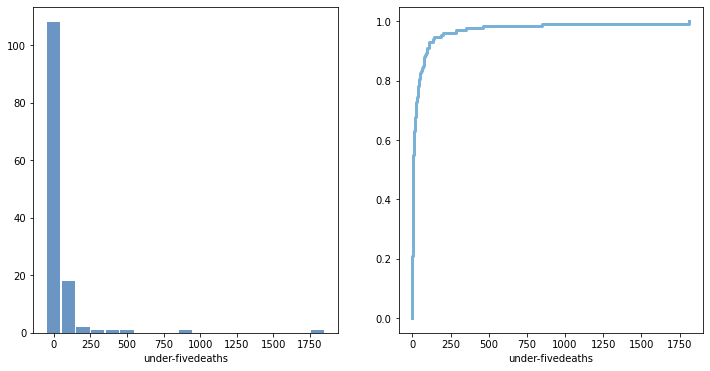

<Figure size 576x432 with 0 Axes>

In [37]:
col3=['AdultMortality','infantdeaths','under-fivedeaths']
i=0
while i < len(col3):
    h = col3[i]
    hist=thinkstats2.Hist(round(df[h],-2))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1


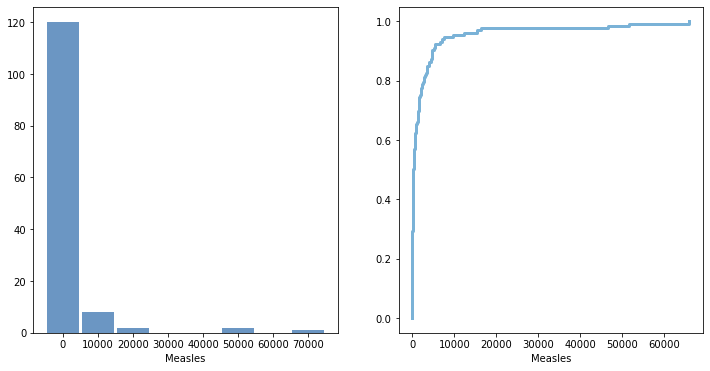

<Figure size 576x432 with 0 Axes>

In [38]:
col4=['Measles']
i=0
while i < len(col4):
    h = col4[i]
    hist=thinkstats2.Hist(round(df[h],-4))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1

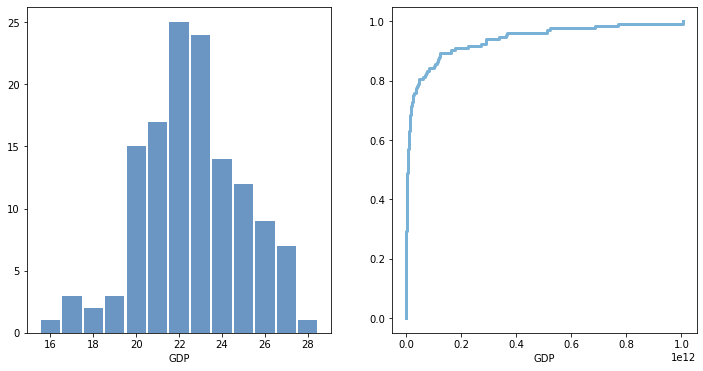

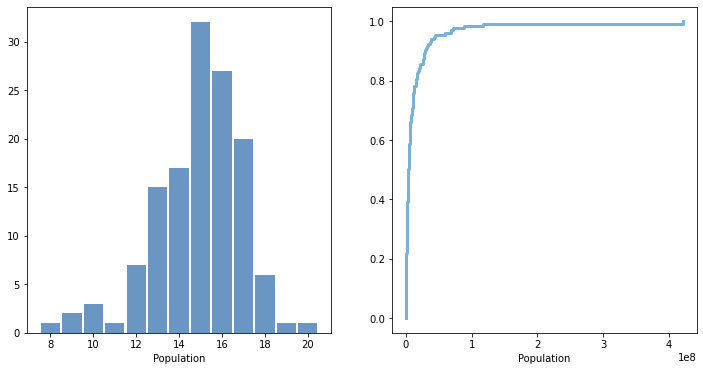

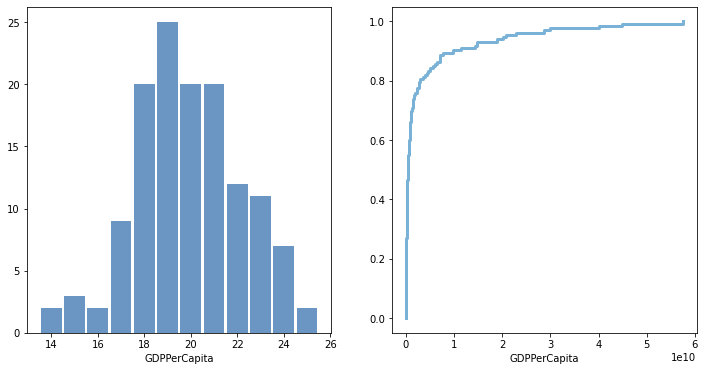

<Figure size 576x432 with 0 Axes>

In [39]:
col5=['GDP','Population','GDPPerCapita']
i=0
while i < len(col5):
    h = (col5[i])
    data = pd.Series(np.log(df[h]))
    hist=thinkstats2.Hist(round(data,0))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [40]:
k2, p=ss.normaltest(df["Schooling"])
p

0.8061408621435778

we can not reject the hypothesis that the schooling data is normally distributed

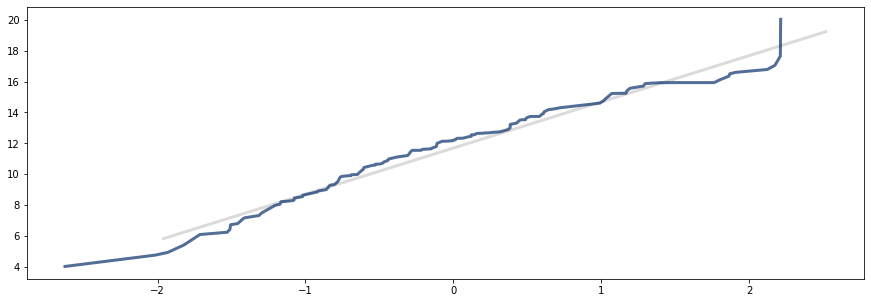

In [41]:
#Analytical for Schooling
thinkstats2.NormalProbabilityPlot(df["Schooling"])


In [42]:
mu = df["Schooling"].mean()
sigma = df["Schooling"].std()
normz = ss.norm(mu, sigma)

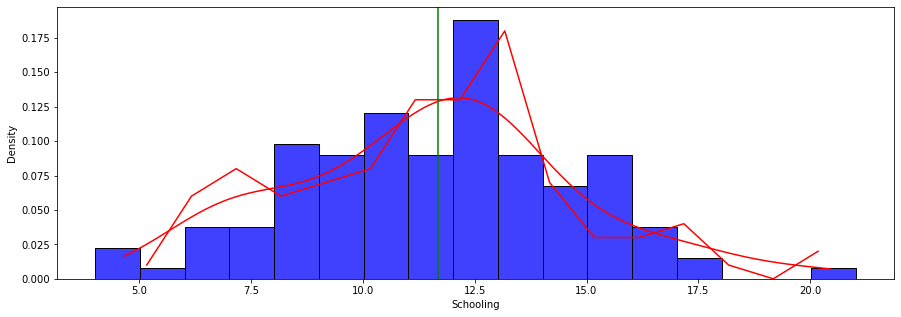

In [43]:
sns.histplot(data=normz.rvs(100), binwidth=1,color='red', stat="density", kde=True, element="poly",fill=False)
sns.histplot(data=df["Schooling"], binwidth=1, color="blue", stat="density")
plt.axvline(mu, color="green")

In [44]:
percent_above=normz.cdf(16.875)
percent_below=normz.cdf(14.875)
range=percent_above-percent_below
print('The percentage of that have schooling level within  1 year of canada is:', round(range*100,2))


The percentage of that have schooling level within  1 year of canada is: 10.25


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

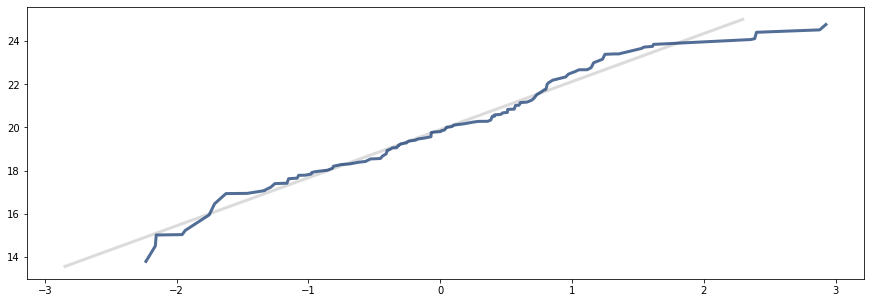

In [45]:
thinkstats2.NormalProbabilityPlot(np.log(df["GDPPerCapita"]))

This data fits a lognormal distribution model

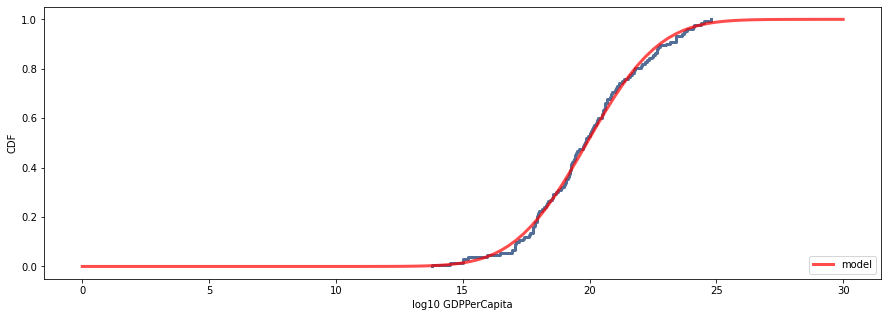

In [46]:

log_GPC=np.log(df["GDPPerCapita"])
cdf_GPC=thinkstats2.Cdf(log_GPC)
thinkplot.Cdf(cdf_GPC) 
mu, sigma = log_GPC.mean(), log_GPC.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=30)
thinkplot.Plot(xs, ps, label='model', color='red')
thinkplot.Config(xlabel='log10 GDPPerCapita', ylabel='CDF', loc='lower right')


The analytical lognormal distribution model seem to accurately represent the GDPPerCapita since the graphs perfectly match each other

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

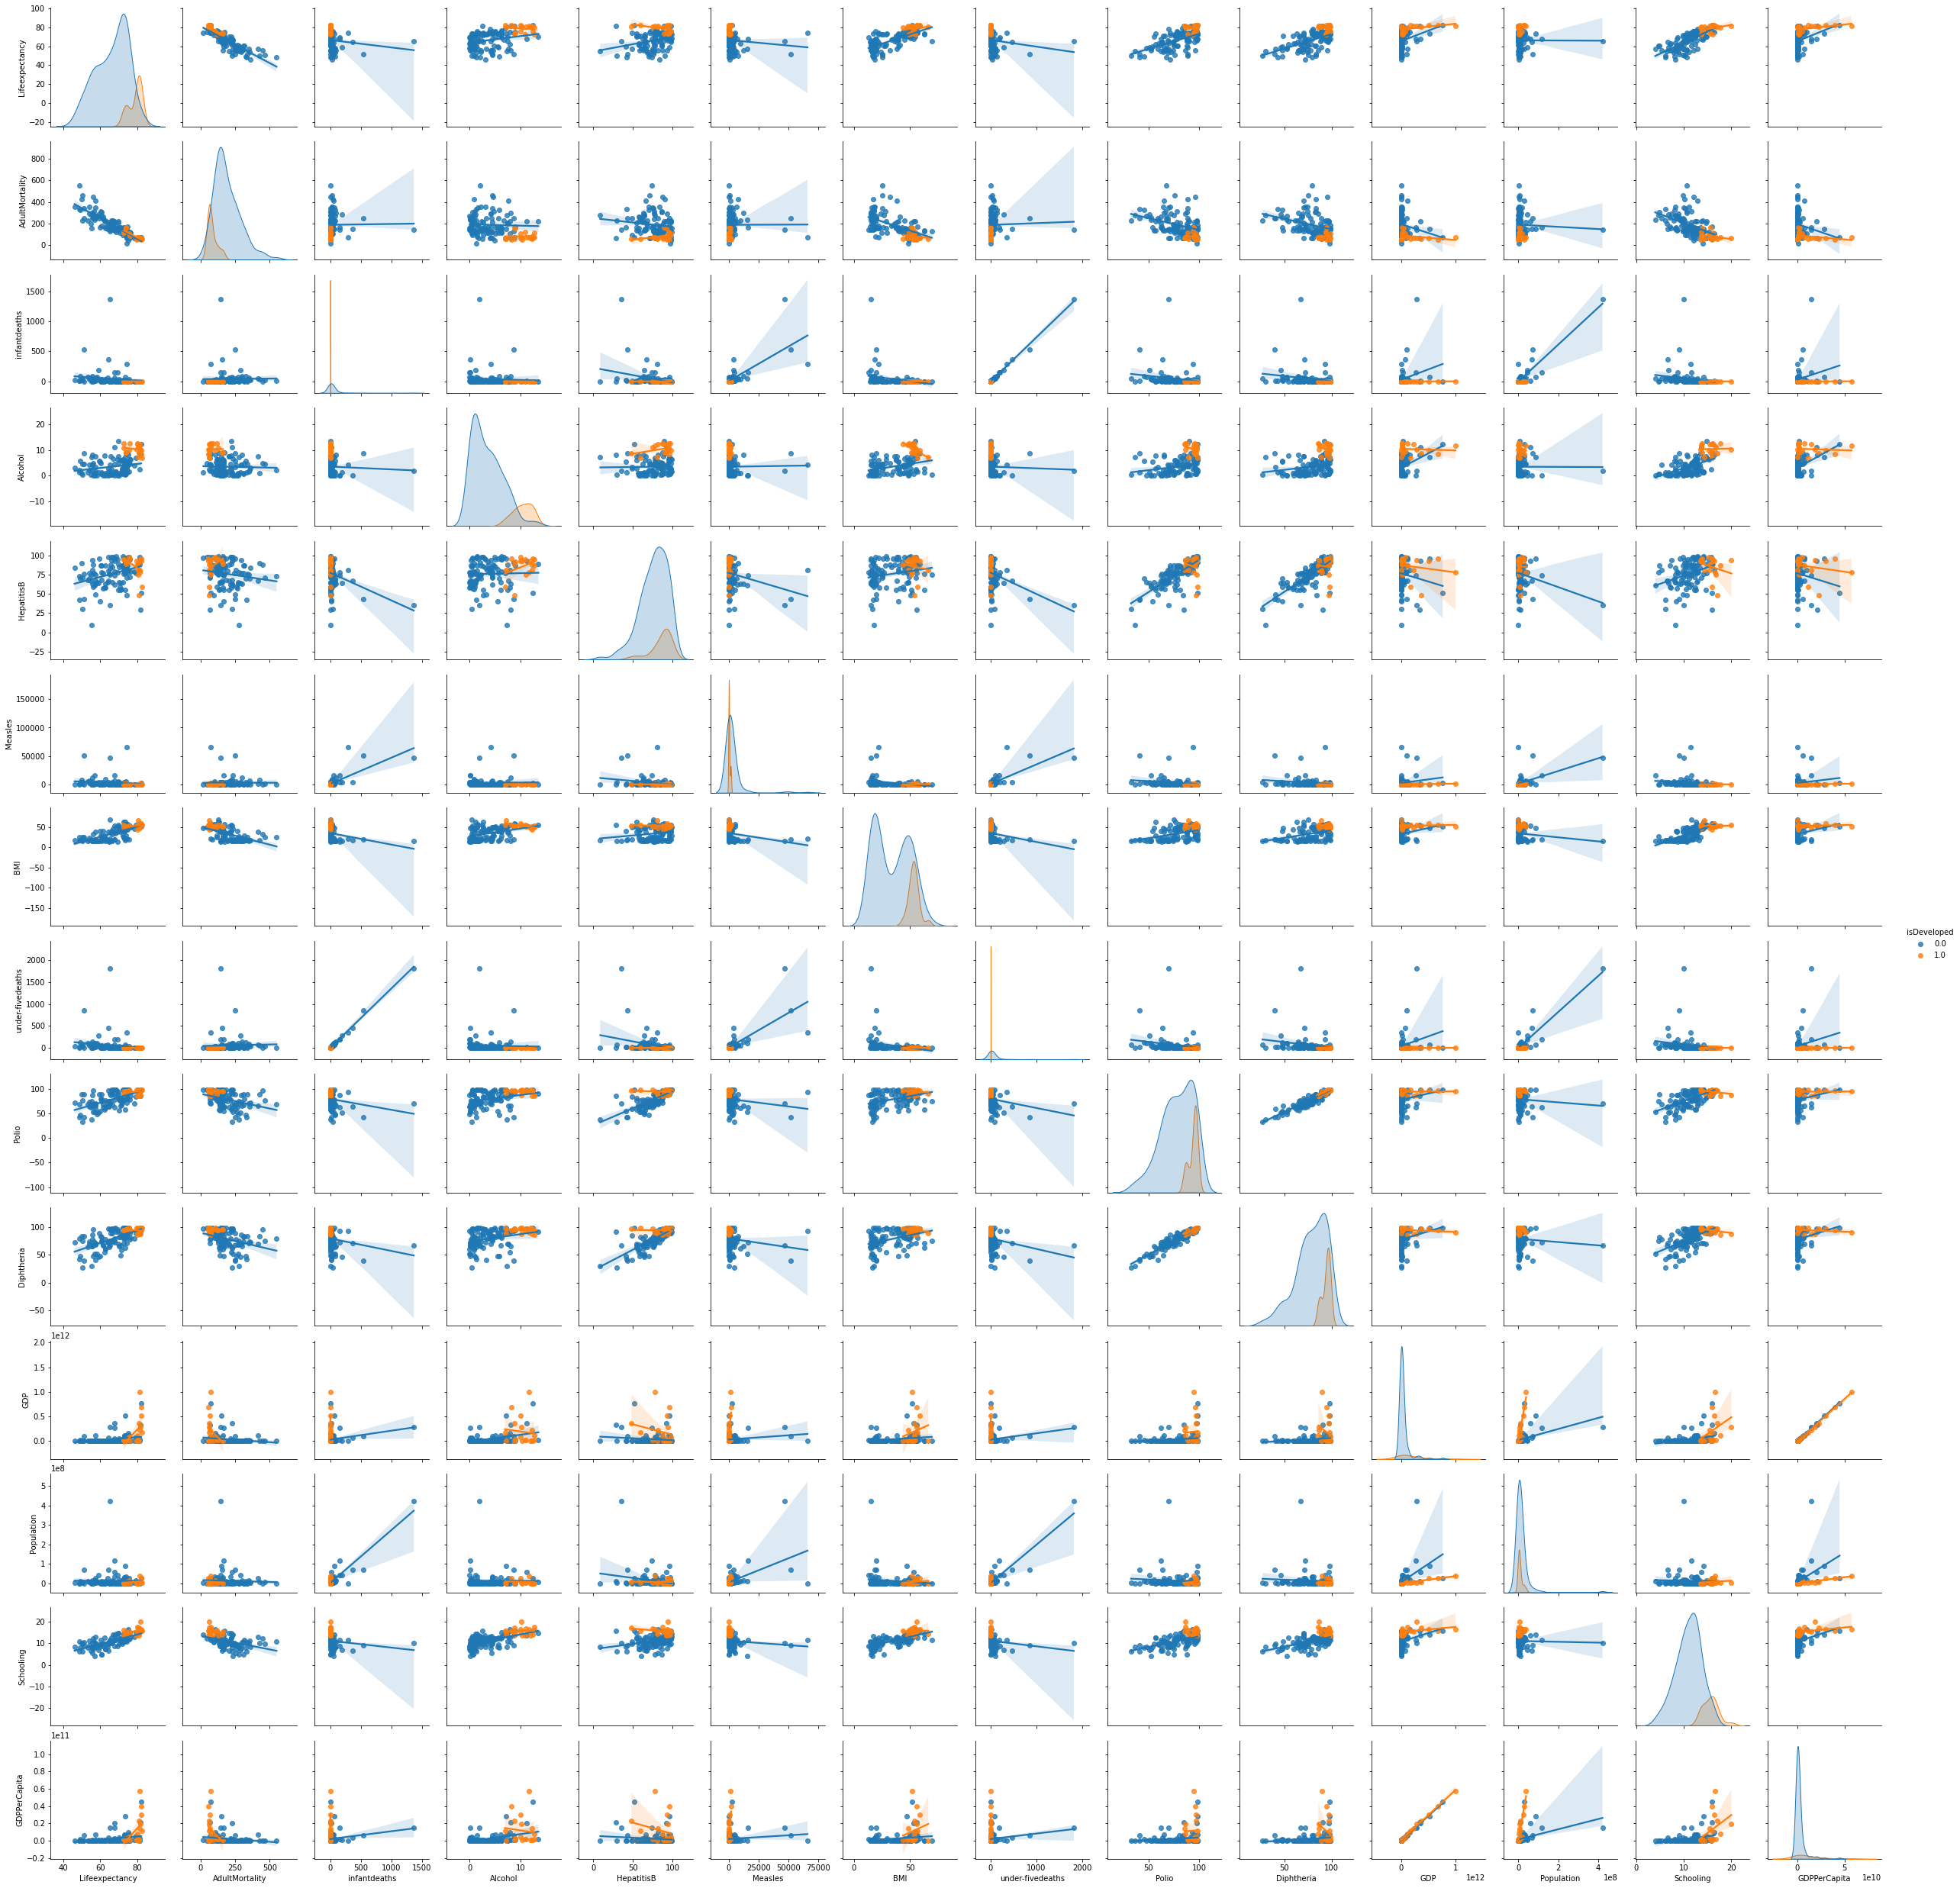

In [47]:
sns.pairplot(df, hue="isDeveloped", kind="reg")

In [48]:

df=df[df['infantdeaths']<200]
df=df[df['under-fivedeaths']<200]
df=df[df['Measles']<10000]
df=df[df['AdultMortality']<500]
df=df[df['GDP']<3.0e+10]
df=df[df['Population']<1e+07]



All these columns were infulenced by outliers that wer way out of line compared to rest of the data. 

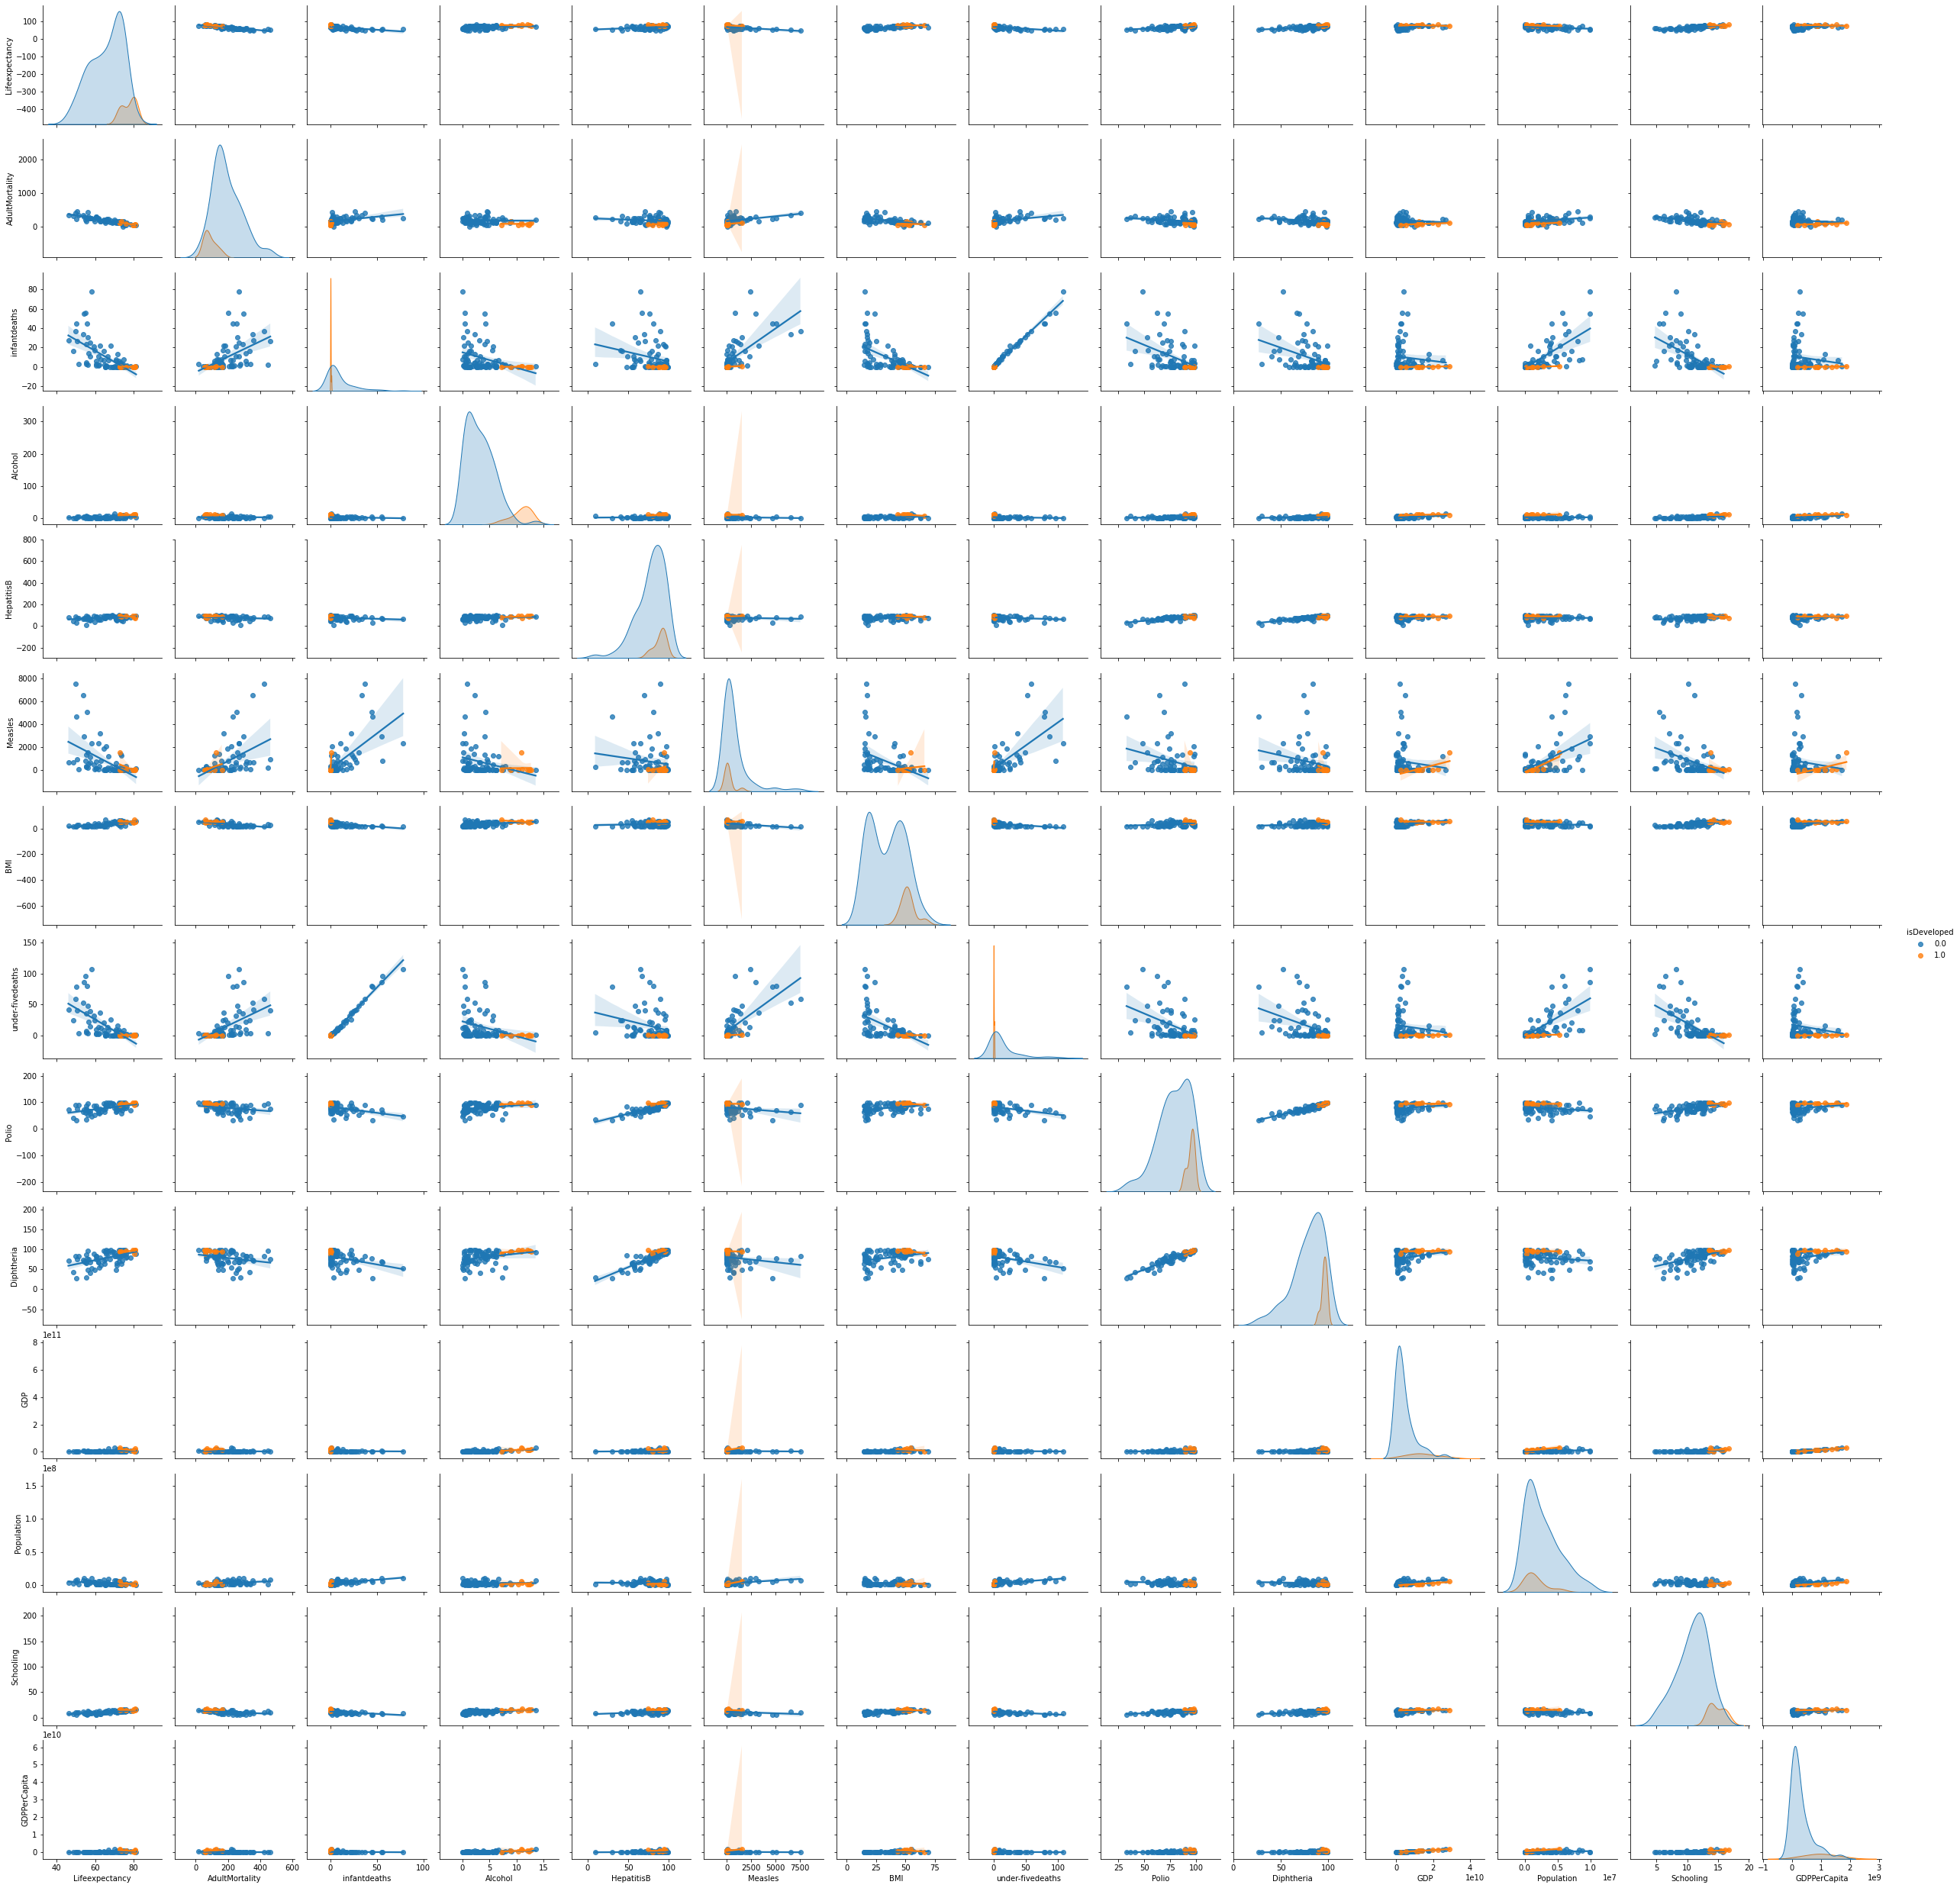

In [49]:
sns.pairplot(df,dropna=True,hue="isDeveloped",kind="reg")
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [50]:
developed=df[df['isDeveloped']==1]
not_developed=df[df['isDeveloped']==0]

In [51]:
#Calculate correlations and analyze. 
df3=df.apply(pd.to_numeric, errors='coerce')
developed=df[df['isDeveloped']==1]
developed = developed.drop(columns=["Country","isDeveloped"])
developed = developed.corr()
developed.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
Lifeexpectancy,1.000000,-0.889243,-0.345360,-0.146365,-0.569432,-0.479842,0.049188,-0.032682,0.451733,0.288391,-0.502102,-0.538320,-0.044319,-0.473062
AdultMortality,-0.889243,1.000000,0.251284,-0.064848,0.327667,0.356805,-0.063189,0.040908,-0.293523,-0.223384,0.450528,0.442987,0.172956,0.435822
infantdeaths,-0.345360,0.251284,1.000000,0.079193,0.061571,0.960920,0.021688,0.830816,0.059311,-0.087781,0.740285,0.913342,-0.108383,0.691328
Alcohol,-0.146365,-0.064848,0.079193,1.000000,0.471501,0.020178,-0.799121,0.123910,0.279864,0.620982,0.470163,0.194715,0.140525,0.519674
HepatitisB,-0.569432,0.327667,0.061571,0.471501,1.000000,0.247405,-0.283537,-0.386936,-0.046941,0.169932,0.097418,0.041545,-0.542820,0.122177


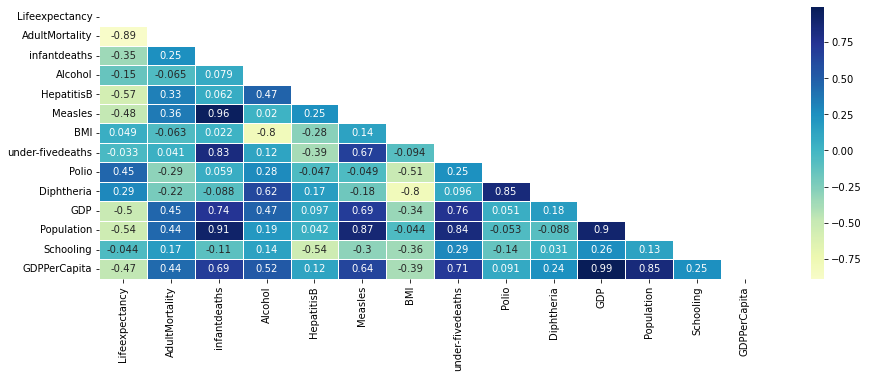

In [52]:
mask = np.triu(np.ones_like(developed, dtype=bool))
sns.heatmap(developed, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

The lifexpectancy in developed countries is strongly correlated to 1)AdultMortality 2)HepetitisB 3)Population
These correlations seem to be supported by reality the lower the mortality the higher the lifeexpectancy. Lower Hepatitis B rate due to vacinations in developed countrie increases the lifeexpectancy of the population and lower the population means better welfare for that population in general which in turn can cause higher lifeexpectancies. 

In [53]:
df3=df.apply(pd.to_numeric, errors='coerce')
not_developed=df[df['isDeveloped']==0]
not_developed = not_developed.drop(columns=["Country","isDeveloped"])
not_developed = not_developed.corr()
not_developed.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
Lifeexpectancy,1.000000,-0.858510,-0.627578,0.204609,0.363032,-0.514502,0.716154,-0.641845,0.497636,0.501180,0.306359,-0.337001,0.724283,0.322661
AdultMortality,-0.858510,1.000000,0.473809,-0.023561,-0.165996,0.462878,-0.604380,0.472852,-0.261714,-0.245763,-0.156809,0.339983,-0.490720,-0.168373
infantdeaths,-0.627578,0.473809,1.000000,-0.271370,-0.223648,0.657259,-0.524893,0.992764,-0.449926,-0.379945,-0.088585,0.697869,-0.553616,-0.109309
Alcohol,0.204609,-0.023561,-0.271370,1.000000,0.103193,-0.214684,0.288163,-0.258757,0.237275,0.235834,0.477185,-0.034784,0.428501,0.490782
HepatitisB,0.363032,-0.165996,-0.223648,0.103193,1.000000,-0.129310,0.159126,-0.233584,0.870918,0.883722,0.148029,-0.050321,0.415340,0.146031


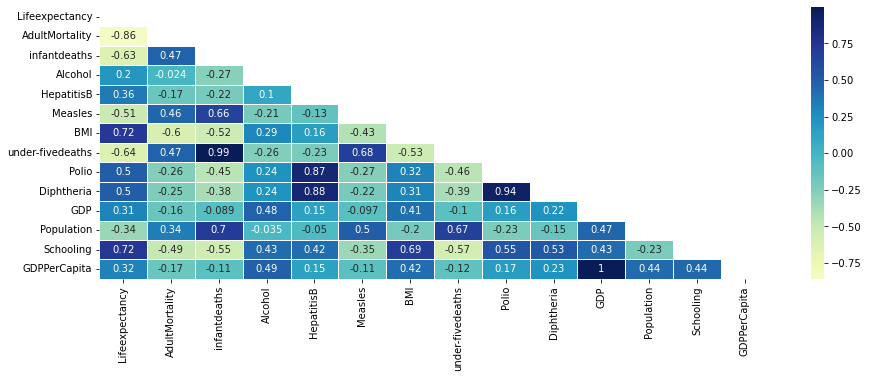

In [54]:
mask = np.triu(np.ones_like(not_developed, dtype=bool))
sns.heatmap(not_developed, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

The lifexpectancy in developing countries is strongly corelated to 1)Adultmortality 2)Schooling 3)BMI
These correlations defenitely make sense lower adultmortallity will result in higher lifeexpectancy. Several studes have asssociated more schooling with better health and longer life. So, it makes makes sence that individuals with higher schooling have longer lifeexpectancy. In developing countries higher BMI are a result to low quality diet which cause several diseases such as cancer and cardiovascular diseases and individuals with higher BMIs are expected to have a lower lifeexpectancy. studies have shown that for every one-unit increase in body mass index (BMI), a person’s life expectancy dropped by seven months.  

The 2 areas where developing and developed country are sigificantly different in regards to lifeexpectancy are HepatitisB and GDP. HepetitisB is rare in developed countries due to vaccination however they are fairly common in developing countries with low vaccination rates. Therefore this correlation makes sense. 